## Mục lục:
* [II. Nền tảng Toán học của Lan truyền ngược qua thời gian](#section-ii)
* [III. Giải pháp và Các phương pháp huấn luyện khác](#section-iii)

# II. Nền tảng Toán học của Lan truyền ngược qua thời gian <a id="section-ii"></a>

## Nền tảng Toán học <a id="section-ii-1"></a>

### The Backpropagation algorithm 

1. Initialize all weights $w_{ji}$ to small random values.

2. Repeat until convergence (or for a fixed number of epochs):

   For each training example $(\mathbf{x}, \mathbf{t})$:

   1. **Forward Pass**  
      Input the training example to the network and compute the outputs $o_k$.

   2. **Compute Output Error**  
      For each output unit $k$:
      $$
      \delta_k \leftarrow o_k (1 - o_k)(t_k - o_k) \tag{1}
      $$

   3. **Compute Hidden Layer Error**  
      For each hidden unit $h$:
      $$
      \delta_h \leftarrow o_h (1 - o_h) \sum_{k \in \text{outputs}} w_{kh} \delta_k \tag{2}
      $$

   4. **Update Weights**  
      For each weight $w_{ji}$:
      $$
      \Delta w_{ji} \leftarrow \eta \, \delta_j \, x_{ji} \tag{3}
      $$
      $$
      w_{ji} \leftarrow w_{ji} + \Delta w_{ji} \tag{4}
      $$


#### Derivation of the Backpropagation Rule

$$
E_d(\vec{w}) = \frac{1}{2}(t_d - o_d)^2 \tag{1}
$$

Stochastic gradient descent involves iterating through the training examples one at a time.  
In other words, for each training example $d$, every $w_{ji}$ is updated by adding to it $\Delta w_{ji}$:

$$\Delta w_{ji} = -\eta \frac{\partial E_d}{\partial w_{ji}} \tag{2}$$

where $E_{d}$ is the error on training example $d$, summed over all ouput units.

$$
E_d(\vec{w}) \equiv \frac{1}{2} \sum_{k \in \text{outputs}} (t_k - o_k)^2 \tag{3}
$$

To begin, notice that weight $w_{ji}$ can influence the rest of the network through $net_{j}$. So, we can use the chain rule to write:
$$
\frac{\partial E_d}{\partial w_{ji}} = \frac{\partial E_d}{\partial \text{net}_j} \frac{\partial \text{net}_j}{\partial w_{ji}} = \frac{\partial E_d}{\partial \text{net}_j} x_{ji} \tag{4}
$$
Now our remaining task is to derive a convenient expression for $\frac{\partial E_d}{\partial \text{net}_j}$.

We consider two cases: (1) the case where unit $j$ is an output unit and (2) the case where $j$ is an internal unit.

**(1) Training rule for output unit weights.**

Just as $w_{ji}$ can influence the rest of the network only through $net_j$, $net_j$ can influence the network only through $o_j$. So, we can use the chain rule again to write:

$$\frac{\partial E_d}{\partial \text{net}_j} = \frac{\partial E_d}{\partial \text{o}_j} \frac{\partial \text{o}_j}{\partial \text{net}_j} \tag{5}$$

$$\frac{\partial E_d}{\partial \text{o}_j} = \frac{\partial}{\partial \text{o}_j} \frac{1}{2} \sum_{k \in \text{outputs}} (t_k - o_k)^2 \tag{6}$$

The derivatives in the right hand side will be zero for all output units $k$ except when $k = j$.

We have:
$$\frac{\partial E_d}{\partial \text{o}_j} = \frac{\partial}{\partial \text{o}_j} \frac{1}{2} (t_j - o_j)^2$$
$$= \frac{1}{2} 2 (t_j - o_j) \frac{\partial (t_j - o_j)}{\partial o_j}$$
$$= - (t_j - o_j) \tag{7}$$

Next consider the second term in Equation (5). Since oj = $\partial (net_j)$, the derivative $\frac {o_j}{net_j}$ is just the derivative of the sigmod function, which we have already noted is equal to $\sigma (net_j)(1- \sigma(net_j))$. Therefore,

$$\frac{\partial o_j}{\partial \text{net}_j} = \frac{\partial \sigma (net_j)}{\partial \text{net}_j}$$
$$= o_j(1-o_j) \tag{8}$$

Substituting expressions (7) and (8) into (5), we obtain:

$$\frac{\partial E_d}{\partial \text{net}_j} = - (t_j - o_j)o_j(1-o_j) \tag{9}$$

And combining this with Equation (2) and (4), we have the stochastic gradient descent rule for output units
$$\Delta w_{ji} = -\eta \frac{\partial E_d}{\partial w_{ji}} = \eta(t_j - o_j)o_j(1-o_j) \tag{10}x_{ji}$$

This training rule is exactly the weight update rule, implemented by Equation (1) and (2) in the Backpropagation algorithm. Furthermore, we can see that $\delta_k$ in Equation(2) is equal to the quantity - $\frac {\partial E_d}{\partial net_k}$.

**(2) Training rule for Hidden Unit Weights**

In the case where $j$ is a hidden unit in the network, the derivation of the training rule for $w_{ji}$ must take into account the indirect ways in which $w_{ji}$ can influence the network outputs and hence $E_d$.
For this reason, we will find it useful to refer to the set of all units immediately downstream of unit $j$ in the network. We denote this set of units by Downstream(j).
Notice that $net_j$ can influence the network outputs (and therefore $E_d$) only through the units in Downstream(j). Therefore, we can write:

$$\frac{\partial E_d}{\partial \text{net}_j} = \sum_{k \in \text{Downstream(j)}} \frac{\partial E_d}{\partial \text{net}_k} \frac{\partial net_k}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k \frac{\partial net_k}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k \frac{\partial net_k}{\partial \text{o}_j} \frac{\partial o_j}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k w_{kj} \frac{\partial o_j}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k w_{kj} o_j(1-o_j)$$

Rearranging terms and using $\delta_j$ to denote - $\frac {\partial E_d}{\partial net_j}$, we have:
$$\delta_j = o_j(1-o_j) \sum_{k \in \text{Downstream(j)}} \delta_k w_{kj}$$
, and:
$$\Delta w_{ji} = \eta \delta_i x_{ji}$$


The **RNN** has three sets of parameters (or weights), shared across all time steps:

- **$U$**: Transforms the input $x_t$ into the state $s_t$  
- **$W$**: Transforms the previous state $s_{t-1}$ into the current state $s_t$  
- **$V$**: Maps the newly computed internal state $s_t$ to the output $y_t$  

$U$, $V$, and $W$ apply **linear transformations** over their respective inputs. The most basic form of such a transformation is the familiar **fully connected (FC)** operation. Therefore, $U$, $V$, and $W$ are **weight matrices**.

We can now define the internal state and the RNN output as:

$$
s_t = f(s_{t-1} W + x_t U)
$$

$$
y_t = s_t V
$$


We can **stack multiple RNNs** to form a **stacked RNN** (also known as a multi-layer RNN).

In this structure, the **cell state** $ s_t^l $ of an RNN cell at **level $ l $** and **time $ t $** takes as input:

- the **output** $ y_t^{l-1} $ from the RNN cell at the **previous level $ l-1 $**, and  
- the **previous state** $ s_{t-1}^l $ of the cell at the **same level $ l $**.

This can be expressed as:
$$
s_t^l = f(s_{t-1}^l, y_t^{l-1})
$$

- One-to-one, One-to-many, Many-to-one, Many-to-many (indirect and direct).

## Lan truyền ngược qua thời gian (Backpropagation Through Time - BPTT) <a id="section-ii-1-1"></a>

The recurrence relation defined by this RNN is $s_t = f(s_{t-1} W + x_t U)$. Note that this is a linear model since we don’t apply a non-linear function in this formula. The states, $s_t$, and the weights, $W$ and $U$, are single scalar values. $x_t$ represents a single element of the input sequence (one or zero). Set $U=1$, then whenever input is received, we will get its full value. Set $W=1$, then the value we would accumulate would never decay.



In [1]:
import numpy as np
# The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

def step(s_t, x_t, U, W):
    return x_t * U + s_t * W

def forward(x, U, W):
    # Number of samples in the mini-batch
    number_of_samples = len(x)
    # Length of each sample
    sequence_length = len(x[0])
    # Initialize the state activation for each sample along the sequence
    s = np.zeros((number_of_samples, sequence_length + 1))
    # Update the states over the sequence
    for t in range(0, sequence_length):
        s[:, t + 1] = step(s[:, t], x[:, t], U, W) # step function
    return s

First, we need to compute the **gradient of the output** \( s_t \) with respect to the **loss function** \( J \), denoted as $ \frac{\partial J}{\partial s_t} $.

Once we have this gradient, we **propagate it backward** through the stack of hidden states (activities) that were constructed during the forward pass. In this **backward pass**, we sequentially "pop" the stored activities and **accumulate their error derivatives** at each time step.

The **recurrence relation** for propagating this gradient through time in an RNN—using the **chain rule**—can be written as:

$$
\frac{\partial J}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot \frac{\partial s_t}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot W
$$

The **gradients of the weights** \( U \) and \( W \) in an RNN are **accumulated over all time steps** as follows:

$$
\frac{\partial J}{\partial U} = \sum_{t=0}^{n} \frac{\partial J}{\partial s_t} \cdot x_t
$$

$$
\frac{\partial J}{\partial W} = \sum_{t=0}^{n} \frac{\partial J}{\partial s_t} \cdot s_{t-1}
$$



In [2]:
def backward(x, s, y, W):
    sequence_length = len(x[0])
    # The network output is just the last activation of sequence
    s_t = s[:, -1]
    # Compute the gradient of the output w.r.t. MSE cost function at final state
    gS = 2 * (s_t - y)
    # Set the gradient accumulations to 0
    gU, gW = 0, 0
    # Accumulate gradients backwards
    for k in range(sequence_length, 0, -1):
        # Compute the parameter gradients and accumulate the results.
        gU += np.sum(gS * x[:, k - 1])
        gW += np.sum(gS * s[:, k - 1])
        # Compute the gradient at the output of the previous layer
        gS = gS * W
    return gU, gW


Use gradient descent to optimize our RNN. Compute the gradients (using MSE) with the help of the backward function and use them to update the weights value.

The gradient descent update rule is:

$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

**Where:**

- $ \theta $: The parameter (or vector of parameters) we are trying to optimize.  
- $ \eta $: The learning rate (a small positive scalar).  
- $ J(\theta) $: The loss function (or objective function) we want to minimize.  
- $ \nabla_\theta J(\theta) $: The gradient of the loss function with respect to \( \theta \).

At each step:

* Compute the gradient $\nabla_{\theta} J(\theta)$, which shows the direction of steepest **increase**.
* Subtract this gradient, scaled by $\eta$, to move in the direction of steepest **decrease** (i.e., minimize the function).

$$
U = U - \eta \cdot \frac{\partial L}{\partial U}
$$

$$
W = W - \eta \cdot \frac{\partial L}{\partial W}
$$


In [5]:
def train(x, y, epochs, learning_rate=0.0005):
    """Train the network"""

    # Set initial parameters
    weights = (-2, 0)  # (U, W)

    # Accumulate the losses and their respective weights
    losses, gradients_u, gradients_w = list(), list(), list()

    # Perform iterative gradient descent
    for i in range(epochs):
        # Perform forward and backward pass to get the gradients
        s = forward(x, weights[0], weights[1])

        # Compute the loss
        print(f"y[0]: {y[0]}")
        print(f"s[-1, -1]: {s[-1, -1]}")
        loss = (y[0] - s[-1, -1]) ** 2

        # Store the loss and weights values for later display
        losses.append(loss)

        gradients = backward(x, s, y, weights[1])
        gradients_u.append(gradients[0])
        gradients_w.append(gradients[1])

        # Update each parameter `p` by p = p - (gradient * learning_rate).
        # `gp` is the gradient of parameter `p`
        weights = tuple((p - gp * learning_rate) for p, gp in zip(weights, gradients))

    print(f"weights: {weights}")

    return np.array(losses), np.array(gradients_u), np.array(gradients_w)

In [6]:
losses, gradients_u, gradients_w = train(x, y, epochs=150)

y[0]: 3
s[-1, -1]: 0.0
y[0]: 3
s[-1, -1]: 0.012000432015551999
y[0]: 3
s[-1, -1]: 0.023956940273995777
y[0]: 3
s[-1, -1]: 0.03587518775661135
y[0]: 3
s[-1, -1]: 0.04776070219841201
y[0]: 3
s[-1, -1]: 0.059618890020712176
y[0]: 3
s[-1, -1]: 0.07145504946905189
y[0]: 3
s[-1, -1]: 0.08327438303759327
y[0]: 3
s[-1, -1]: 0.09508200925357348
y[0]: 3
s[-1, -1]: 0.10688297388872176
y[0]: 3
s[-1, -1]: 0.11868226065862321
y[0]: 3
s[-1, -1]: 0.1304848014657405
y[0]: 3
s[-1, -1]: 0.14229548623711516
y[0]: 3
s[-1, -1]: 0.15411917240358286
y[0]: 3
s[-1, -1]: 0.1659606940635994
y[0]: 3
s[-1, -1]: 0.17782487087142398
y[0]: 3
s[-1, -1]: 0.1897165166864033
y[0]: 3
s[-1, -1]: 0.20164044801739198
y[0]: 3
s[-1, -1]: 0.21360149229390551
y[0]: 3
s[-1, -1]: 0.2256044959933831
y[0]: 3
s[-1, -1]: 0.23765433265191854
y[0]: 3
s[-1, -1]: 0.2497559107839654
y[0]: 3
s[-1, -1]: 0.2619141817348056
y[0]: 3
s[-1, -1]: 0.27413414748797355
y[0]: 3
s[-1, -1]: 0.2864208684483156
y[0]: 3
s[-1, -1]: 0.2987794712199204
y[0]: 3

In [7]:
def plot_training(losses, gradients_u, gradients_w, ax1_ymax=20, ax2_ymax=10):
    import matplotlib.pyplot as plt

    # remove nan and inf values
    losses = losses[~np.isnan(losses)][:-1]
    gradients_u = gradients_u[~np.isnan(gradients_u)][:-1]
    gradients_w = gradients_w[~np.isnan(gradients_w)][:-1]

    # plot the weights U and W
    fig, ax1 = plt.subplots(figsize=(5, 3.4))

    # uncomment to plot exploding gradients
    # ax1.set_ylim(-3, 600)
    ax1.set_ylim(-3, ax1_ymax)
    ax1.set_xlabel('epochs')
    ax1.plot(gradients_u, label='grad U', color='blue', linestyle=':')
    ax1.plot(gradients_w, label='grad W', color='red', linestyle='--')
    ax1.legend(loc='upper left')

    # instantiate a second axis that shares the same x-axis
    # plot the loss on the second axis
    ax2 = ax1.twinx()

    # uncomment to plot exploding gradients
    # ax2.set_ylim(-3, 200)
    ax2.set_ylim(-3, ax2_ymax)
    ax2.plot(losses, label='Loss', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    fig.tight_layout()

    plt.show()

Sum of ones RNN from scratch
y[0]: 3
s[-1, -1]: 0.0
y[0]: 3
s[-1, -1]: 0.012000432015551999
y[0]: 3
s[-1, -1]: 0.023956940273995777
y[0]: 3
s[-1, -1]: 0.03587518775661135
y[0]: 3
s[-1, -1]: 0.04776070219841201
y[0]: 3
s[-1, -1]: 0.059618890020712176
y[0]: 3
s[-1, -1]: 0.07145504946905189
y[0]: 3
s[-1, -1]: 0.08327438303759327
y[0]: 3
s[-1, -1]: 0.09508200925357348
y[0]: 3
s[-1, -1]: 0.10688297388872176
y[0]: 3
s[-1, -1]: 0.11868226065862321
y[0]: 3
s[-1, -1]: 0.1304848014657405
y[0]: 3
s[-1, -1]: 0.14229548623711516
y[0]: 3
s[-1, -1]: 0.15411917240358286
y[0]: 3
s[-1, -1]: 0.1659606940635994
y[0]: 3
s[-1, -1]: 0.17782487087142398
y[0]: 3
s[-1, -1]: 0.1897165166864033
y[0]: 3
s[-1, -1]: 0.20164044801739198
y[0]: 3
s[-1, -1]: 0.21360149229390551
y[0]: 3
s[-1, -1]: 0.2256044959933831
y[0]: 3
s[-1, -1]: 0.23765433265191854
y[0]: 3
s[-1, -1]: 0.2497559107839654
y[0]: 3
s[-1, -1]: 0.2619141817348056
y[0]: 3
s[-1, -1]: 0.27413414748797355
y[0]: 3
s[-1, -1]: 0.2864208684483156
y[0]: 3
s[-1, -1

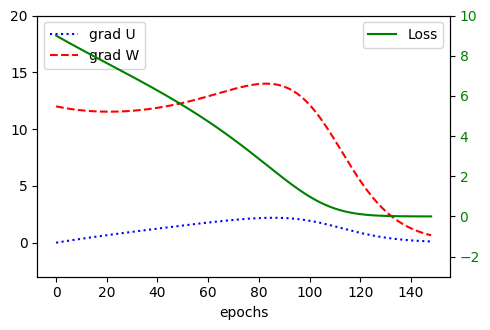

In [8]:
# Use these inputs for normal training
# The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

print("Sum of ones RNN from scratch")

losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w)

y[0]: 12
s[-1, -1]: 0.0
y[0]: 12
s[-1, -1]: 0.04802766392524801
y[0]: 12
s[-1, -1]: 0.0961253085610661
y[0]: 12
s[-1, -1]: 0.1446525918818886
y[0]: 12
s[-1, -1]: 0.1939797347485874
y[0]: 12
s[-1, -1]: 0.2445010922175978
y[0]: 12
s[-1, -1]: 0.2966503120004496
y[0]: 12
s[-1, -1]: 0.3509183461560175
y[0]: 12
s[-1, -1]: 0.4078759498179951
y[0]: 12
s[-1, -1]: 0.46820292868236923
y[0]: 12
s[-1, -1]: 0.5327274275807735
y[0]: 12
s[-1, -1]: 0.6024802455573349
y[0]: 12
s[-1, -1]: 0.678772000852277
y[0]: 12
s[-1, -1]: 0.763305883956946
y[0]: 12
s[-1, -1]: 0.8583476288125823
y[0]: 12
s[-1, -1]: 0.9669913470816927
y[0]: 12
s[-1, -1]: 1.093594818975408
y[0]: 12
s[-1, -1]: 1.2445362880383077
y[0]: 12
s[-1, -1]: 1.4296415100541646
y[0]: 12
s[-1, -1]: 1.6651957064549494
y[0]: 12
s[-1, -1]: 1.981395760480034
y[0]: 12
s[-1, -1]: 2.4455752424120756
y[0]: 12
s[-1, -1]: 3.267005132327328
y[0]: 12
s[-1, -1]: 5.841524050656412
y[0]: 12
s[-1, -1]: 429.54674360636875
y[0]: 12
s[-1, -1]: 1.9180719620274316e+130


C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1820063810.py:7: RuntimeWarning: overflow encountered in multiply
  return x_t * U + s_t * W
C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1406194472.py:12: RuntimeWarning: invalid value encountered in multiply
  gU += np.sum(gS * x[:, k - 1])
C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1406194472.py:13: RuntimeWarning: invalid value encountered in multiply
  gW += np.sum(gS * s[:, k - 1])


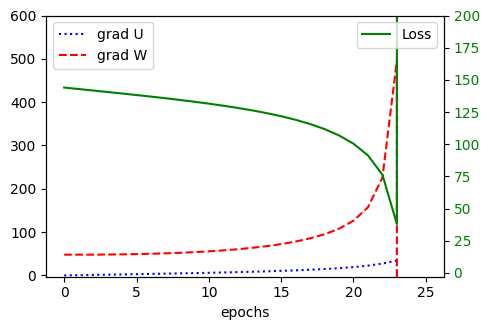

In [9]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 
1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([12])
losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w, 600, 200)

After epoch 23, the gradient becomes so large that it goes out of the range of the float variable and becomes NaN (as illustrated by 
the jump in the plot). This problem is known as exploding gradients.


Exploding gradients can occur in any deep neural network, but they are especially pronounced in **recurrent neural networks (RNNs)** due to how these models process sequences over time.

**Depth through Time**

* In RNNs, the same set of weights is applied at each time step, effectively creating a deep network *unfolded through time*.
* For a long input sequence, this can mean **dozens or hundreds of layers** deep, depending on the sequence length.
* This depth amplifies the risk of gradients either **exploding** (growing exponentially) or **vanishing** (shrinking to zero).

**Gradient Calculation in RNNs**

$$
\frac{\partial J}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot \frac{\partial s_t}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot W
$$

* The gradient at a given time step depends on the product of many Jacobian matrices.
* If the eigenvalues of these matrices are **greater than 1**, the product can grow exponentially → **exploding gradients**.

**Parameter Sharing**

* RNNs use the **same parameters at each time step**, so any instability gets **repeated and accumulated**.
* Unlike a feedforward network where different layers can "learn" to counterbalance each other, RNNs don’t have that flexibility.

**Long-Term Dependencies**

* Trying to learn long-term dependencies increases the length of backpropagation, worsening the chance of gradient instability.

Thus,
* A regular feedforward neural network has a fixed, typically smaller depth.
* While very deep feedforward networks (e.g., 100+ layers) can also suffer from exploding gradients, the problem is **less common** and easier to mitigate with modern architectures (e.g., ResNets, normalization layers).


$$
    \frac{\partial s_t}{\partial s_{t-k}} = \prod_{j=1}^k \phi'(z_{t-j+1}) W  = W^k
$$
In a simple **linear RNN** with scalar weight $W$, the gradient between distant time steps behaves like $W^k$. This means that if $|W| > 1$, the gradient grows exponentially with time steps (exploding gradients), and if $|W| < 1$, it shrinks exponentially (vanishing gradients).

When $W$ is a matrix, this behavior generalizes: the gradient norm is influenced by the **spectral radius** $\rho(W)$, the largest absolute eigenvalue of $W$. If $\rho(W) > 1$, gradients tend to **explode**, and if $\rho(W) < 1$, they tend to **vanish**, though the exact behavior also depends on the activation function and its derivatives.

---

#### 1. **Full BPTT vs. Truncated BPTT.**

*Overview*

| Feature                                   | **Full BPTT**                                 | **Truncated BPTT**                                      |
| ----------------------------------------- | --------------------------------------------- | ------------------------------------------------------- |
| **Definition**                            | Backpropagates through the *entire* sequence  | Backpropagates through only a **fixed number of steps** |
| **Sequence Length**                       | Entire sequence (e.g., 1000 time steps)       | Only recent $k$ steps (e.g., 20 steps)                  |
| **Gradient Flow**                         | Long-term dependencies are captured           | Shorter memory, may miss long-term dependencies         |
| **Computational Cost**                    | High (due to large unrolled graph)            | Lower (smaller computation and memory footprint)        |
| **Training Time**                         | Slower per iteration                          | Faster per iteration                                    |
| **Suitability**                           | Small sequences or where full context matters | Long sequences, real-time or streaming data             |
| **Risk of Vanishing/Exploding Gradients** | Higher (due to long unroll)                   | Lower, but still present in long sequences overall      |

*Explanation*

**Full BPTT**

* The entire sequence is unrolled in time.
* Gradients are backpropagated through **all time steps**.
* **Pros**:

  * Can theoretically learn **long-term dependencies** better.
  * More accurate gradient updates.
* **Cons**:

  * **Expensive** in both computation and memory.
  * High risk of **exploding/vanishing gradients** in long sequences.
  * Not feasible for very long or streaming sequences.

**Truncated BPTT**

* The sequence is divided into chunks or windows of $k$ time steps.
* Backpropagation is done **only within each chunk**.
* **Pros**:

  * Much **faster** and more memory-efficient.
  * Scales to **long or infinite sequences** (e.g., live audio/text).
* **Cons**:

  * May **miss long-term dependencies** beyond the truncation window.
  * Can introduce **temporal fragmentation** (model sees limited context).

*Example*

Training a language model on a paragraph of 1000 tokens:

* **Full BPTT**:

  * Unrolls all 1000 steps.
  * Backpropagates gradients through the full paragraph.
  * High compute and memory cost.

* **Truncated BPTT (e.g., with k=50)**:

  * Processes 50-token chunks (with hidden state carried forward).
  * Backpropagates gradients only through the last 50 tokens.
  * Faster, but can forget dependencies earlier in the paragraph.

*When to Use?*

| Scenario                                   | Recommended Approach                                       |
| ------------------------------------------ | ---------------------------------------------------------- |
| Small datasets with short sequences        | Full BPTT                                                  |
| Long sequences (e.g., text, audio)         | Truncated BPTT                                             |
| Real-time or streaming applications        | Truncated BPTT                                             |
| When learning long dependencies is crucial | Consider Full BPTT or LSTMs with longer truncation windows |

#### 2. **Randomized Truncation** and **Standard Truncation**

**Overview: Randomized vs. Standard Truncation in TBPTT**

| Feature                          | **Standard Truncation**                        | **Randomized Truncation**                                     |
| -------------------------------- | ---------------------------------------------- | ------------------------------------------------------------- |
| **Truncation Length**            | Fixed (e.g., always 20 steps)                  | Random (e.g., sampled from a distribution)                    |
| **Update Frequency**             | Regular and predictable                        | Irregular, varies per iteration                               |
| **Gradient Variance**            | Lower variance, more stable updates            | Higher variance, but can provide better expectation           |
| **Learning Long Dependencies**   | Often misses some patterns due to fixed window | More flexible; may better approximate full BPTT over time     |
| **Computational Predictability** | Very predictable memory/compute usage          | Slightly less predictable per batch                           |
| **Use Case**                     | Simple, stable training setups                 | When modeling stochastic behavior or improving generalization |

**Standard Truncation**

* A **fixed window size** is chosen (e.g., 20 time steps).
* At each update, the RNN processes a chunk of $k$ steps and backpropagates only within that fixed window.
* **Pros**:

  * Easy to implement.
  * Computationally efficient and consistent.
* **Cons**:

  * May create **bias** in gradient estimation.
  * Can miss learning from longer or irregular dependencies.

**Randomized Truncation**

* The length of the truncated sequence is **randomized** per update.
* Truncation lengths are sampled from a probability distribution (e.g., geometric, uniform).
* First proposed by researchers (e.g., Tallec & Ollivier) to make truncated BPTT more statistically faithful to **full BPTT**.

*Example*

* Instead of always truncating at 20 steps, sample truncation lengths from a **geometric distribution** with mean 20.

**Pros**:

* Produces an **unbiased estimator** of the full BPTT gradient in expectation.
* Encourages the model to sometimes **see longer dependencies**, even if only occasionally.
* Better theoretical properties in **online and continual learning** setups.

**Cons**:

* **Higher variance** in gradient estimates → can slow convergence.
* Harder to parallelize consistently due to varying sequence lengths.

*Key Insight*

* **Standard truncation** = efficient, stable, but potentially biased (especially if long-term dependencies matter).
* **Randomized truncation** = more faithful to full BPTT in expectation, allows learning a wider range of dependencies, but noisier.

*When to Use?*

| Scenario                                                                          | Best Approach                             |
| --------------------------------------------------------------------------------- | ----------------------------------------- |
| **fast, stable training** on long sequences                              | **Standard truncation**                   |
| **approximate full BPTT** without the cost, or improve generalization | **Randomized truncation**                 |
| **reinforcement learning**, online, or stochastic environments  | **Randomized truncation** often preferred |

---

#### 1. **Gradient Clipping**

**What it does:**

* Gradient clipping **limits (clips)** the size of the gradients during backpropagation.
* If the gradient norm exceeds a certain threshold, it’s rescaled to prevent it from growing too large.

**How it helps:**

* Prevents the gradient from "exploding" and causing **numerical instability** or **model divergence**.
* Especially useful in **standard RNNs** when training on long sequences.

**Mathematically:**
If the gradient norm ‖g‖ exceeds a threshold τ, we rescale it:

$$
g \leftarrow \frac{τ}{\|g\|} \cdot g
$$

This keeps the updates stable without stopping learning.

#### 2. **BPTT in LSTM and GRU**

**LSTM** and **GRU** are designed to overcome these issues with **gating mechanisms** that manage the flow of information through time. These gates allow the network to better retain important gradients and control how much information to "forget" or "remember" over time.

**LSTM (Long Short-Term Memory)**

LSTM has a more sophisticated structure with **three gates**:

* **Forget gate**: Decides which information to discard from the cell state.
* **Input gate**: Determines which new information to store in the cell state.
* **Output gate**: Controls the output of the cell state based on the current input and previous hidden state.

**BPTT in LSTM** works as follows:

1. **Cell State and Gradient Flow**:

   * The **cell state** in LSTM flows mostly unchanged through time, allowing gradients to propagate through many steps without diminishing or exploding.
   * The gates allow the model to selectively **forget or add information** to the cell state at each time step.

2. **Gradient Calculation**:

   * During BPTT, the gradient of the loss is passed back through time, but the **cell state** helps preserve the gradient over many time steps.
   * Gradients are **scaled and gated** by the forget and input gates, helping to maintain stability.
   * The gates ensure that the gradients neither vanish nor explode because they have controlled, multiplicative paths through time.

**Mathematically:**

* The gradient of the loss with respect to the weights at each time step is influenced by the **gates**. For example, the update for the cell state would depend on how the **forget gate** and **input gate** interact with the incoming gradients:

  $$
  \frac{\partial L}{\partial C_t} = \frac{\partial L}{\partial h_t} \cdot \frac{\partial h_t}{\partial C_t} 
  $$

  where $C_t$ is the cell state, and the gradient term is modulated by the gates controlling its flow.

**GRU (Gated Recurrent Unit)**

The GRU is a simpler version of LSTM, with **two gates**:

* **Update gate**: Decides how much of the previous memory to retain.
* **Reset gate**: Decides how much of the previous memory to forget when updating the hidden state.

**BPTT in GRU**:

1. **Simpler Gate Structure**:

   * Unlike LSTM, which has separate input and forget gates, GRU combines them into a single **update gate**.
   * The **reset gate** helps decide how much of the previous memory should be used when computing the current hidden state.

2. **Gradient Flow**:

   * The gradients are passed through the update and reset gates, which control how information is carried forward or forgotten, stabilizing the gradient flow across time steps.

3. **Gradient Calculation**:

   * The gradient flow through GRUs is controlled by the gates, similar to LSTMs but in a simplified form.
   * The update gate ensures that the model can **preserve** or **update** its memory without letting gradients vanish or explode.

**Comparison of Gradient Flow in BPTT:**

| Architecture    | Gradient Flow Through Time                                                                                                           | Key Feature of BPTT                                                          |
| --------------- | ------------------------------------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------- |
| **Regular RNN** | Gradients are passed through the same weight matrix repeatedly, causing **vanishing or exploding gradients**                         | No control over how much memory is retained, leading to instability          |
| **LSTM**        | **Cell state** helps preserve gradients across time, **gates** regulate flow of information, preventing gradient explosion/vanishing | Gates (input, forget, and output) control gradient flow and memory retention |
| **GRU**         | **Update and reset gates** manage memory retention and flow of information, reducing gradient issues                                 | Simpler gates than LSTM, but still effectively control gradient flow         |

**Summary of How LSTM and GRU Mitigate Gradient Issues:**

* **LSTM** uses the **cell state** to allow gradients to flow through many time steps without exploding or vanishing. The gates in LSTM (forget, input, output) ensure that the model can regulate how information is stored and passed through time.
* **GRU**, while simpler, uses **update and reset gates** to control the flow of information and ensure the gradients are stable during BPTT.

In both architectures, the key is that **gating mechanisms** help control the flow of information and gradients, allowing the network to learn long-term dependencies without encountering the exploding or vanishing gradient problems typical in regular RNNs.

#### 3. **Gradient-free methods**

**Gradient-free methods** are optimization techniques that do **not rely on gradient information** to update model parameters. Instead of computing derivatives (like in gradient descent), they search for the optimal solution using other strategies, such as **random sampling**, **evolutionary algorithms**, or **pattern-based search**.

Gradient-free methods are especially useful when:

* **Gradients are hard to compute**, noisy, or undefined (e.g., in non-differentiable, discrete, or black-box functions).
* **Function evaluation is expensive or limited**, and analytic gradients are unavailable.
* Dealing with **reinforcement learning**, **simulation-based models**, or **combinatorial optimization**.

Common Gradient-Free Optimization Methods

| Method                                | Description                                                                                                                        |
| ------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Random Search**                     | Tries random parameter settings and selects the best. Simple but inefficient.                                                      |
| **Grid Search**                       | Systematic exploration of a parameter grid. Effective only in low dimensions.                                                      |
| **Evolutionary Algorithms**           | Inspired by natural selection (e.g., Genetic Algorithms, Covariance Matrix Adaptation Evolution Strategy (CMA-ES)). Evolves a population of solutions.                               |
| **Bayesian Optimization**             | Builds a probabilistic model of the function and chooses points to evaluate based on acquisition functions.                        |
| **Simulated Annealing**               | Random search with a decreasing “temperature” that controls acceptance of worse solutions.                                         |
| **Particle Swarm Optimization (PSO)** | Population-based method where particles move through the search space influenced by their own and neighbors’ best-known positions. |

*Applications*

* **Hyperparameter tuning** (e.g., in AutoML or deep learning)
* **Reinforcement learning** (e.g., black-box policy search)
* **Robotics** (e.g., physical controllers where gradients are inaccessible)
* **Neural architecture search** and optimization of non-differentiable objective functions

*Limitations*

* Generally **slower** and **less sample-efficient** than gradient-based methods in smooth, differentiable settings.
* Do **not scale well** to high-dimensional parameter spaces unless adapted.

Thus,

Gradient-free methods are powerful tools for optimization when gradients are **unavailable**, **unreliable**, or **too expensive to compute**. While they may be slower, they are **more flexible** and applicable in many real-world scenarios where gradient-based methods fail.

#### 4. **Real-Time Recurrent Learning (RTRL)**

**Overview: BPTT vs. RTRL**

| Feature                         | **BPTT**                                   | **RTRL**                                        |
| ------------------------------- | ------------------------------------------ | ----------------------------------------------- |
| **Learning Type**               | **Offline / batch-based**                  | **Online / real-time**                          |
| **Gradient Calculation**        | Unrolls RNN in time and backpropagates     | Computes gradients recursively in real-time     |
| **Memory Usage**                | High (stores entire sequence for backprop) | Extremely high (stores all partial derivatives) |
| **Computational Complexity**    | $O(T \cdot n^2)$                           | $O(n^4)$ (very expensive)                       |
| **Suitable for Long Sequences** | Yes (with truncation)                      | No (prohibitively expensive)                    |
| **Streaming / Real-Time Input** | Poor fit (delayed updates)                 | Excellent (updates per time step)               |
| **Parallelism**                 | Batch-friendly, can be parallelized        | Hard to parallelize due to sequential updates   |

**Real-Time Recurrent Learning (RTRL)**

* RTRL is an **online algorithm**: it updates weights **immediately after each time step**.
* Maintains a full **Jacobian matrix** of how the hidden state depends on each weight.
* At each time step, it updates both the hidden state and the gradients of the state with respect to the weights.

**Pros**:

* True **online learning** — ideal for streaming data or control systems.
* **No truncation** — gradients are fully propagated.

**Cons**:

* **Computationally infeasible** for large networks: $O(n^4)$ complexity.
* Difficult to scale or implement in practice.

---

*Key Differences*

| Aspect            | **BPTT**                                  | **RTRL**                               |
| ----------------- | ----------------------------------------- | -------------------------------------- |
| Training delay    | Updates happen **after** a sequence/chunk | Updates happen **at each time step**   |
| Gradient accuracy | Truncated or full (batch)                 | Exact and real-time                    |
| Efficiency        | Efficient with truncation                 | Not efficient for large models         |
| Practical use     | Widely used in deep learning              | Rare, mostly academic or in toy setups |

*When to Use?*

| Scenario                        | Recommended Approach                   |
| ------------------------------- | -------------------------------------- |
| Training RNNs on large datasets | **BPTT** (with or without truncation)  |
| Real-time control or robotics   | **RTRL** (or approximations like Unbiased Online Recurrent Optimization (UORO)) |
| Streaming or lifelong learning  | **RTRL variants** (if compute allows)  |


*RTRL Alternatives*

Due to RTRL’s impractical complexity, **approximate online RTRL methods** have been proposed:

* **UORO** (Unbiased Online Recurrent Optimization)
* **KF-RTRL** (Kronecker-Factored RTRL)
* **NoBackTrack** (approximate gradient estimator)

These aim to **retain real-time capability** while keeping computational cost manageable.

# III. Giải bài tập

**Đề bài:**

1. Giả sử chúng ta có một ma trận đối xứng $ M \in \mathbb{R}^{n \times n} $ với các giá trị riêng $ \lambda_i $ và các vector riêng tương ứng $ \mathbf{v}_i $ ($ i = 1, \ldots, n $). Không mất tính tổng quát, giả sử chúng được sắp xếp theo thứ tự $ |\lambda_i| \geq |\lambda_{i+1}| $.  

    a. Chứng minh rằng $ M^k $ có các giá trị riêng $ \lambda_i^k $.  

    b. Chứng minh rằng với một vector ngẫu nhiên $ \mathbf{x} \in \mathbb{R}^n $, xác suất cao là $ M^k \mathbf{x} $ sẽ rất gần với vector riêng $ \mathbf{v}_1 $ của $ M $. Hãy làm rõ phát biểu này.  

    c. Kết quả trên có ý nghĩa gì đối với gradient trong các mạng RNN?

2. Ngoài việc cắt gradient (gradient clipping), còn phương pháp nào khác để xử lý hiện tượng bùng nổ gradient (gradient explosion) trong mạng nơ-ron hồi tiếp (RNN) không?

### Bài làm

#### 1. Chứng minh rằng $M^k$ có các giá trị riêng là $\lambda_i^k$.

**Chứng minh:**

Giả sử $M$ là một ma trận đối xứng có các giá trị riêng $\lambda_i$ và các vectơ riêng tương ứng $\mathbf{v}_i$, ta có:

$$
M \mathbf{v}_i = \lambda_i \mathbf{v}_i.
$$

Áp dụng lũy thừa $M^k$ lên vectơ riêng $\mathbf{v}_i$:

$$
M^k \mathbf{v}_i = M^{k-1} (M \mathbf{v}_i) = M^{k-1} (\lambda_i \mathbf{v}_i) = \lambda_i M^{k-1} \mathbf{v}_i.
$$

Tiếp tục lặp lại quá trình này $k$ lần, ta được:

$$
M^k \mathbf{v}_i = \lambda_i^k \mathbf{v}_i.
$$

Vậy nên, $M^k$ có cùng vectơ riêng $\mathbf{v}_i$, với giá trị riêng tương ứng là $\lambda_i^k$.



In [1]:
import numpy as np

# Tạo một ma trận đối xứng M
n = 3
M = np.random.randn(n, n)
M = M + M.T  # Biến M thành ma trận đối xứng

# Tính giá trị riêng và vectơ riêng
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Giá trị riêng ban đầu:", eigenvalues)

# Tính M^k (k=2 để minh họa)
k = 2
M_k = np.linalg.matrix_power(M, k)

# Giá trị riêng của M^k
eigenvalues_k = np.linalg.eig(M_k)[0]
print("Giá trị riêng của M^k:", eigenvalues_k)

# So sánh với λ_i^k
expected_eigenvalues_k = eigenvalues ** k
print("Giá trị riêng dự kiến (λ_i^k):", expected_eigenvalues_k)

Giá trị riêng ban đầu: [ 3.88627042  0.33611039 -1.697007  ]
Giá trị riêng của M^k: [15.10309781  0.11297019  2.87983277]
Giá trị riêng dự kiến (λ_i^k): [15.10309781  0.11297019  2.87983277]


**Giải thích kết quả:**

* Kết quả cho thấy các giá trị riêng của $M^k$ trùng khớp với $\lambda_i^k$, xác nhận lý thuyết đã nêu.

---

#### 2. Chứng minh rằng với một vectơ ngẫu nhiên $\mathbf{x} \in \mathbb{R}^n$, với xác suất cao thì $M^k \mathbf{x}$ sẽ gần như song song với vectơ riêng $\mathbf{v}_1$ của $M$. Hình thức hóa phát biểu này.

**Chứng minh:**

Một vectơ ngẫu nhiên $\mathbf{x} \in \mathbb{R}^n$ có thể được biểu diễn dưới dạng tổ hợp tuyến tính của các vectơ riêng của $M$:

$$
\mathbf{x} = \sum_{i=1}^n c_i \mathbf{v}_i,
$$

với các hệ số $c_i$ là ngẫu nhiên (và $c_1 \neq 0$ với xác suất cao, vì tập các vectơ trực giao với $\mathbf{v}_1$ có độ đo bằng không).

Áp dụng $M^k$ lên $\mathbf{x}$:

$$
M^k \mathbf{x} = \sum_{i=1}^n c_i M^k \mathbf{v}_i = \sum_{i=1}^n c_i \lambda_i^k \mathbf{v}_i.
$$

Vì $\lambda_i^k$ tăng hoặc giảm theo cấp số nhân khi $k$ tăng, và $|\lambda_1| \geq |\lambda_2| \geq \cdots \geq |\lambda_n|$, nên khi $k$ lớn và $|\lambda_1| > |\lambda_2|$, thì:

$$
M^k \mathbf{x} \approx c_1 \lambda_1^k \mathbf{v}_1,
$$

và hướng của $M^k \mathbf{x}$ gần như trùng với $\mathbf{v}_1$.

**Phát biểu hình thức:**

Với một vectơ ngẫu nhiên $\mathbf{x} = \sum_{i=1}^n c_i \mathbf{v}_i$, với $c_1 \neq 0$, ta có:

$$
\frac{\| \text{proj}_{\mathbf{v}_1} (M^k \mathbf{x}) \|}{\| M^k \mathbf{x} \|} = \frac{|c_1 \lambda_1^k|}{\sqrt{\sum_{i=1}^n |c_i \lambda_i^k|^2}} \to 1 \quad \text{khi} \quad k \to \infty,
$$

nếu $|\lambda_1| > |\lambda_2|$.


In [2]:
import numpy as np

# Tạo một ma trận đối xứng có giá trị riêng trội
n = 3
M = np.array([[2, 0, 0],
              [0, 1, 0],
              [0, 0, 0.5]])  # λ1=2 > λ2=1 > λ3=0.5
eigenvalues, eigenvectors = np.linalg.eig(M)
v1 = eigenvectors[:, 0]  # Vectơ riêng trội

# Tạo vectơ ngẫu nhiên x
x = np.random.randn(n)

# Áp dụng M^k lên x với các giá trị k tăng dần
for k in [1, 5, 10]:
    M_k = np.linalg.matrix_power(M, k)
    M_k_x = M_k @ x
    # Chuẩn hóa M_k_x và tính độ hội tụ với v1
    alignment = np.abs(np.dot(M_k_x / np.linalg.norm(M_k_x), v1))
    print(f"k={k}, độ hội tụ với v1: {alignment:.4f}")

k=1, độ hội tụ với v1: 0.9825
k=5, độ hội tụ với v1: 1.0000
k=10, độ hội tụ với v1: 1.0000


**Giải thích kết quả:**

* Khi $k$ tăng, $M^k \mathbf{x}$ ngày càng gần với hướng của $\mathbf{v}_1$, chứng minh sự hội tụ dần theo vectơ riêng trội (vectơ riêng chi phối).

---

#### 3. Kết quả trên có ý nghĩa gì đối với gradient trong RNN?

**Ý nghĩa đối với Gradient trong RNN:**

Trong mạng nơ-ron hồi tiếp (Recurrent Neural Networks - RNNs), việc tính gradient liên quan đến việc lũy thừa ma trận trọng số $W$ (tương tự như $M$ trong bài toán). Kết quả trên cho thấy rằng:

* Nếu $W$ có một giá trị riêng trội $\lambda_1$ với $|\lambda_1| > 1$, thì việc nhân lặp đi lặp lại với $W$ (như trong quá trình lan truyền ngược qua thời gian) sẽ khiến gradient bùng nổ, và dần dần hướng của gradient sẽ trùng với vectơ riêng trội $\mathbf{v}_1$.
* Nếu $|\lambda_1| < 1$, gradient sẽ tiêu biến, cũng dần trùng với $\mathbf{v}_1$.

Điều này lý giải **hiện tượng tiêu biến và bùng nổ gradient** trong RNN: gradient có xu hướng trùng với vectơ riêng trội và tăng hoặc giảm theo cấp số nhân khi số bước thời gian tăng, khiến việc huấn luyện RNN sâu trở nên khó khăn.

Để khắc phục điều này, người ta sử dụng các kỹ thuật như:

* **Gradient clipping** (cắt gradient) để xử lý gradient bùng nổ.
* Các kiến trúc như **LSTM** và **GRU** để giảm thiểu vấn đề gradient tiêu biến.


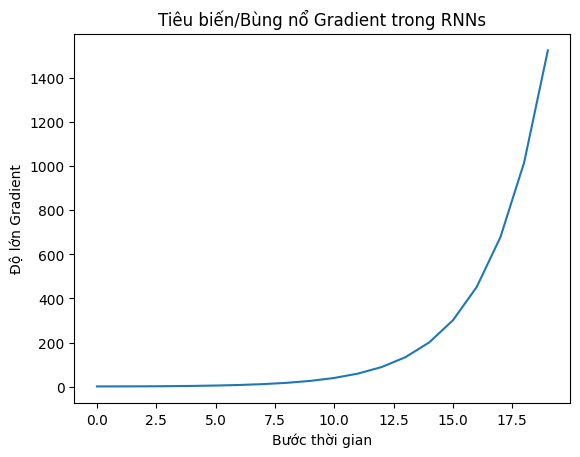

In [3]:
import numpy as np

# Mô phỏng gradient trong RNN (lặp nhân với W)
n = 3
W = np.array([[1.5, 0, 0],
              [0, 0.9, 0],
              [0, 0, 0.5]])  # λ1=1.5 (bùng nổ), λ2=0.9 (tiêu biến)

# Gradient ban đầu (vectơ ngẫu nhiên)
grad = np.random.randn(n)

# Theo dõi độ lớn gradient qua các bước thời gian
time_steps = 20
grad_norms = []
for t in range(time_steps):
    grad = W @ grad
    grad_norms.append(np.linalg.norm(grad))

# Vẽ biểu đồ độ lớn gradient
import matplotlib.pyplot as plt
plt.plot(grad_norms)
plt.xlabel("Bước thời gian")
plt.ylabel("Độ lớn Gradient")
plt.title("Tiêu biến/Bùng nổ Gradient trong RNNs")
plt.show()

**Giải thích kết quả:**

* Nếu $|\lambda| > 1$: Gradient tăng theo cấp số nhân → bùng nổ.
* Nếu $|\lambda| < 1$: Gradient giảm dần → tiêu biến.

---

### Tóm lại:

1. **Giá trị riêng của $M^k$** được xác nhận bằng `np.linalg.matrix_power` và so sánh với $\lambda_i^k$.
2. **Hướng của $M^k \mathbf{x}$** dần trùng với vectơ riêng trội khi $k$ tăng.
3. **Gradient trong RNN** được mô phỏng, cho thấy rõ hiện tượng tiêu biến hoặc bùng nổ phụ thuộc vào giá trị riêng của ma trận trọng số.

#### 2. Ngoài việc cắt gradient (gradient clipping), còn một số phương pháp khác để xử lý hiện tượng nổ gradient (gradient explosion) trong mạng nơ-ron hồi tiếp (RNN), bao gồm:

1. **Chuẩn hóa gradient (Gradient normalization)**: Thay vì chỉ cắt gradient, có thể chuẩn hóa toàn bộ vector gradient để giữ cho độ lớn của nó trong một phạm vi hợp lý.

2. **Khởi tạo trọng số thích hợp (Proper weight initialization)**: Sử dụng các phương pháp khởi tạo như Xavier (Glorot) hoặc He initialization để tránh tạo ra gradient quá lớn ngay từ đầu.

3. **Sử dụng các kiến trúc RNN cải tiến**: Các biến thể như LSTM (Long Short-Term Memory) hoặc GRU (Gated Recurrent Unit) giúp kiểm soát luồng thông tin và gradient tốt hơn, giảm nguy cơ nổ gradient.

4. **Sử dụng kỹ thuật chuẩn hóa như Layer Normalization hoặc Batch Normalization**: Những kỹ thuật này giúp ổn định phân phối của đầu ra và gradient trong quá trình huấn luyện.

5. **Giảm độ dài chuỗi đầu vào (Truncated BPTT)**: Hạn chế số bước thời gian được dùng trong lan truyền ngược giúp giảm nguy cơ nổ gradient.

6. **Sử dụng học suất thích nghi (Adaptive learning rate optimizers)**: Các bộ tối ưu như Adam, RMSprop có thể điều chỉnh học suất động, giúp kiểm soát gradient tốt hơn.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Một RNN đơn giản
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # chỉ lấy output của bước thời gian cuối
        return out

# Khởi tạo mô hình, loss, optimizer
model = SimpleRNN(input_size=10, hidden_size=128, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Dữ liệu giả lập
inputs = torch.randn(32, 20, 10)  # (batch_size, seq_len, input_size)
targets = torch.randn(32, 1)

# Huấn luyện với gradient clipping
outputs = model(inputs)
loss = criterion(outputs, targets)
loss.backward()

# Gradient clipping ở đây (ví dụ: giới hạn norm ở mức 5.0)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

optimizer.step()
optimizer.zero_grad()


In [7]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Phần train vẫn tương tự, chỉ thay đổi mô hình
model = LSTMModel(input_size=10, hidden_size=128, output_size=1)


# Tài liệu tham khảo
- Cloudflare. (n.d.). What is a neural network? Cloudflare. Retrieved April 25, 2025, from https://www.cloudflare.com/learning/ai/what-is-neural-network/
- D2L Vietnam. (n.d.). Mạng nơ-ron hồi quy (Recurrent Neural Networks). Dive into Deep Learning (D2L). Retrieved April 25, 2025, from https://d2l.aivivn.com/chapter_recurrent-neural-networks/rnn_vn.html
- Malik, A. (2022, December 26). A brief introduction to recurrent neural networks. Towards Data Science. Retrieved April 27, 2025, from https://towardsdatascience.com/a-brief-introduction-to-recurrent-neural-networks-638f64a61ff4/
- StatQuest with Josh Starmer. (2022, July 11). Recurrent Neural Networks (RNNs), Clearly Explained!!!. YouTube. https://youtu.be/AsNTP8Kwu80?si=P1-F2Ypu-MJC-VqT
- Wikipedia contributors. (n.d.). Vanishing gradient problem. Wikipedia. Retrieved April 27, 2025, from https://en.wikipedia.org/wiki/Vanishing_gradient_problem
- Werbos, P. J. (1990). Backpropagation through time: what it does and how to do it. Proceedings of the IEEE, 78(10), 1550-1560.
- Jaeger, H. (2002). Tutorial on training recurrent neural networks, covering BPTT, RTRL, EKF and the "echo state network" approach. GMD-Forschungszentrum Informationstechnik.
- Bengio, Y., Simard, P., & Frasconi, P. (1994). Learning long-term dependencies with gradient descent is difficult. IEEE Transactions on Neural Networks, 5(2), 157-166.